In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#Step 1: Load and Explore the Data

Load the dataset into a Pandas DataFrame.

### Perform exploratory data analysis (EDA):

* Check for missing values, data types, and summary statistics.

* Identify potential outliers in numerical columns.

* Analyze the distribution of categorical variables.

In [ ]:
# Load the dataset
df = pd.read_csv('heart_disease.csv')

In [ ]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

In [ ]:
# Basic info
print("Dataset Info:")
print(df.info())

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

In [ ]:
# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Detect outliers using IQR
outliers_info = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outliers.shape[0]
    }
# Display outlier summary
for col, info in outliers_info.items():
    print(f"\nColumn: {col}")
    print(f"  Lower Bound: {info['Lower Bound']}")
    print(f"  Upper Bound: {info['Upper Bound']}")
    print(f"  Outliers Detected: {info['Outlier Count']}")

In [ ]:
# List of categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Print value counts
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# Optional: Visualize distributions
plt.figure(figsize=(16, 12))
for idx, col in enumerate(categorical_cols):
    plt.subplot(3, 3, idx+1)
    sns.countplot(x=col, data=df, hue=col, legend=False, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

# Step 2: Data Cleaning and Preprocessing

### Handle Missing Values (if needed):

* Replace missing numerical values with the mean/median.

* Replace missing categorical values with the mode.

### Handle Outliers (if needed):

* Use appropriate methods (e.g., IQR or z-score) to detect and handle outliers.

###Encode Categorical Variables:

* Use one-hot encoding for multi-category variables (chest pain type, resting electrocardiographic results, thal).

* Use binary encoding for sex and fasting blood sugar.

###Scale Numerical Features:

* Scale features such as resting blood pressure, serum cholesterol, maximum heart rate, and oldpeak using StandardScaler or MinMaxScaler.

In [ ]:
# numerical columns to check
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Capping outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

print("Outliers handled using IQR capping.")

In [ ]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

print("Unique values:\n")
print("sex:", df['sex'].unique())
print("fbs:", df['fbs'].unique())

In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Columns to scale
cols_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Apply scaler and update dataframe
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Show scaled columns
print(df[cols_to_scale].head())

#Step 3: Train-Test Split

Split the data into training and testing sets:

###For Regression:
Predict serum cholesterol as the target variable and remaining as features

###For Classification:

Predict target (presence of heart disease) as the target variable and remaining as features

In [ ]:
# Features and target for regression
X_reg = df.drop(columns=['chol'])  # Drop target column
y_reg = df['chol']                 # Target column

# Split into training and testing sets (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train_reg.shape)
print("X_test shape :", X_test_reg.shape)
print("y_train shape:", y_train_reg.shape)
print("y_test shape :", y_test_reg.shape)

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target for classification
X_clf = df.drop(columns=['target'])  # Drop target column
y_clf = df['target']                 # Target column

# Split into training and testing sets (80% train, 20% test)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Check shapes
print("X_train shape:", X_train_clf.shape)
print("X_test shape :", X_test_clf.shape)
print("y_train shape:", y_train_clf.shape)
print("y_test shape :", y_test_clf.shape)

#Step 4: Build Machine Learning Models

###Regression Task:

Train the following models to predict serum cholesterol.

* Linear regression
* SVM
* Random Forest

###Classification Task:

Train the following models to predict target:

* Logistic Regression
* K-Nearest Neighbors (KNN)
* Random Forest

In [ ]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_model.predict(X_test_reg)

# 2. Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_reg, y_train_reg)
y_pred_svr = svr_model.predict(X_test_reg)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_model.predict(X_test_reg)

In [ ]:
# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf)

# 2. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf, y_train_clf)
y_pred_knn = knn.predict(X_test_clf)

# 3. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(X_test_clf)

# Step 5: Evaluate Models on Test Data

## For Regression:

###Evaluate the Linear Regression model using:

* Mean Absolute Error (MAE)

* Mean Squared Error (MSE)

* R-squared (R²) (Key performance metric)

## For Classification:

###Evaluate each classification model using:


*   Accuracy
*   Precision
* Recall (Key performance metric)
* F1-Score

In [ ]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred) # Calculate MSE first
    print(f"\n {model_name} Performance:")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE:  {mse:.2f}") # Print MSE
    print(f"RMSE: {np.sqrt(mse):.2f}") # Calculate and print RMSE
    print(f"R²:   {r2_score(y_true, y_pred):.2f}")

evaluate(y_test_reg, y_pred_lr, "Linear Regression")
evaluate(y_test_reg, y_pred_svr, "SVR")
evaluate(y_test_reg, y_pred_rf, "Random Forest")

In [ ]:
def evaluate_clf(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")  # Key metric
    print(f"F1-Score:  {f1_score(y_true, y_pred):.2f}")

evaluate_clf(y_test_clf, y_pred_log, "Logistic Regression")
evaluate_clf(y_test_clf, y_pred_knn, "K-Nearest Neighbors")
evaluate_clf(y_test_clf, y_pred_rf, "Random Forest")

#Step 6:
### Summarize the classification and regression result in a table form and declare the best performing model in each category based on the performance metric choosen.

In [ ]:
# Calculate regression metrics
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

mae_svr = mean_absolute_error(y_test_reg, y_pred_svr)
mse_svr = mean_squared_error(y_test_reg, y_pred_svr)
r2_svr = r2_score(y_test_reg, y_pred_svr)

mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

# Regression metrics
regression_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regressor', 'Random Forest Regressor'],
    'MAE': [mae_lr, mae_svr, mae_rf],
    'MSE': [mse_lr, mse_svr, mse_rf],
    'R²': [r2_lr, r2_svr, r2_rf]
})

# Calculate classification metrics
acc_log = accuracy_score(y_test_clf, y_pred_log)
prec_log = precision_score(y_test_clf, y_pred_log)
recall_log = recall_score(y_test_clf, y_pred_log)
f1_log = f1_score(y_test_clf, y_pred_log)

acc_knn = accuracy_score(y_test_clf, y_pred_knn)
prec_knn = precision_score(y_test_clf, y_pred_knn)
recall_knn = recall_score(y_test_clf, y_pred_knn)
f1_knn = f1_score(y_test_clf, y_pred_knn)

acc_rf = accuracy_score(y_test_clf, y_pred_rf)
prec_rf = precision_score(y_test_clf, y_pred_rf)
recall_rf = recall_score(y_test_clf, y_pred_rf)
f1_rf = f1_score(y_test_clf, y_pred_rf)


# Classification metrics
classification_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest Classifier'],
    'Accuracy': [acc_log, acc_knn, acc_rf],
    'Precision': [prec_log, prec_knn, prec_rf],
    'Recall': [recall_log, recall_knn, recall_rf],
    'F1-Score': [f1_log, f1_knn, f1_rf]
})

# Sort based on key metric
regression_summary = regression_summary.sort_values(by='R²', ascending=False)
classification_summary = classification_summary.sort_values(by='Recall', ascending=False)

# Display summaries
print("Regression Model Performance Summary:")
print(regression_summary)

print("\nClassification Model Performance Summary:")
print(classification_summary)

# Identify best model for each task based on key metric
best_regression = regression_summary.loc[regression_summary['R²'].astype(float).idxmax()]
best_classification = classification_summary.loc[classification_summary['Recall'].astype(float).idxmax()]

print("\nBest Performing Models:")
print(f"Regression: {best_regression['Model']} with R² = {best_regression['R²']:.2f}")
print(f"Classification: {best_classification['Model']} with Recall = {best_classification['Recall']:.2f}")

#Step 7: Bonus Task:
Create a custom Linear Regression class using which regression task can be carried out on multi-dimentional data (unlike the class room example where the number of features was 1).

Write the mathematical derivation for the gradient equations (add as screenshot to notebook).


In [ ]:
class CustomLinearRegression:
    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.loss_history = []

    def fit(self, X, y):
        m, n = X.shape
        # Add bias term (intercept)
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.zeros((n + 1, 1))
        y = y.reshape(-1, 1)

        for _ in range(self.n_iterations):
            # Ensure X_b is of a numeric type
            X_b_numeric = X_b.astype(float)
            gradients = (1/m) * X_b_numeric.T.dot(X_b_numeric.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradients
            loss = np.mean((X_b_numeric.dot(self.theta) - y) ** 2) # Calculate loss using numeric X_b
            self.loss_history.append(loss)

    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        # Ensure X_b is of a numeric type for prediction
        X_b_numeric = X_b.astype(float)
        return X_b_numeric.dot(self.theta)

    def get_params(self):
        return self.theta

# Example: Use features to predict serum cholesterol
X = df.drop(columns=['chol', 'target']).values
y = df['chol'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train custom model
model = CustomLinearRegression(learning_rate=0.0001, n_iterations=1000) # Reduced learning rate
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Custom Linear Regression Evaluation:")
print("MSE:", mse)
print("R² Score:", r2)

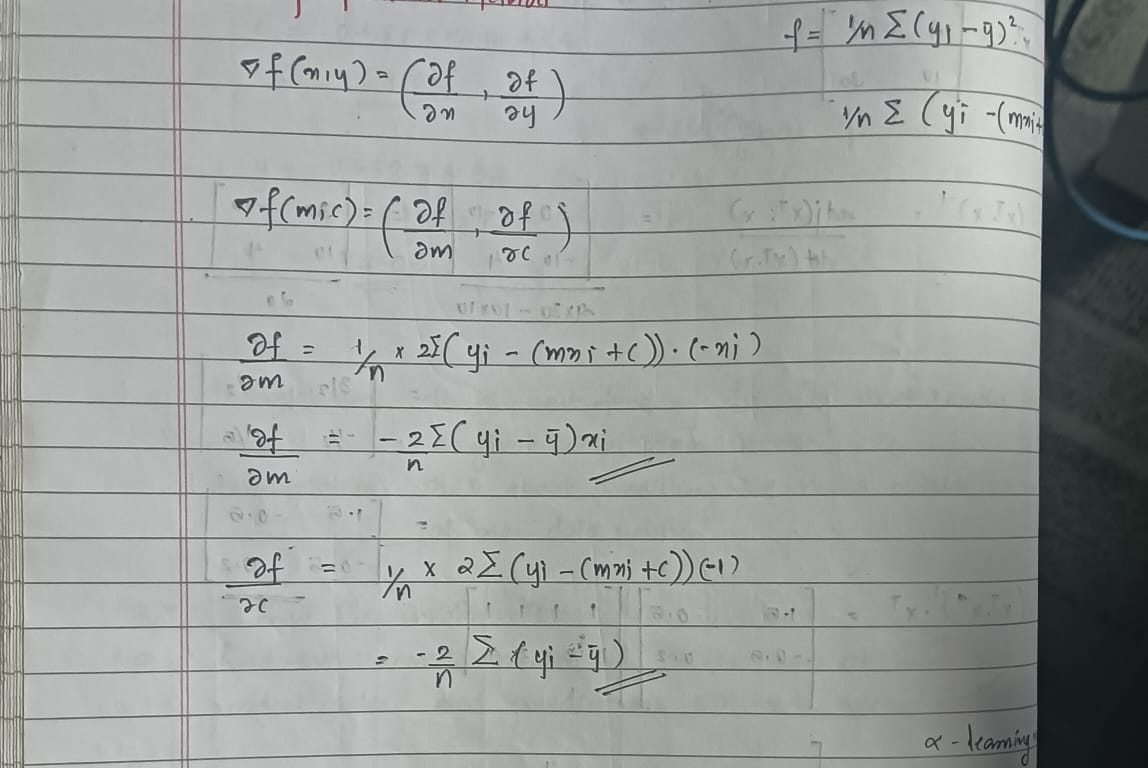